<a href="https://colab.research.google.com/github/naorex/Python3rdGrade_Deep_Learning_Beginner/blob/main/Chapter06_%E5%AD%A6%E7%BF%92%E6%B8%88%E3%81%BF%E3%83%A2%E3%83%87%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGG16 の学習済みモデルを使う

- オックスフォード大学が開発した16層の畳み込み層モデル

In [1]:
from keras.applications.vgg16 import VGG16
model = VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


In [2]:
model.summary(line_length=120)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━
┃ Layer (type)                                        ┃ Output Shape                           ┃               Para
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━
│ input_layer (InputLayer)                            │ (None, 224, 224, 3)                    │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ block1_conv1 (Conv2D)                               │ (None, 224, 224, 64)                   │                 1,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ block1_conv2 (Conv2D)                               │ (None, 224, 224, 64)                   │                36,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ block1_pool (MaxPooling2D)                          │ (None, 112, 112, 64)                   │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ block2_conv1 (Conv2D)                               │ (None, 112, 112, 128)                  │                73,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ block2_conv2 (Conv2D)                               │ (None, 112, 112, 128)                  │               147,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ block2_pool (MaxPooling2D)                          │ (None, 56, 56, 128)                    │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ block3_conv1 (Conv2D)                               │ (None, 56, 56, 256)                    │               295,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ block3_conv2 (Conv2D)                               │ (None, 56, 56, 256)                    │               590,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ block3_conv3 (Conv2D)                               │ (None, 56, 56, 256)                    │               590,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ block3_pool (MaxPooling2D)                          │ (None, 28, 28, 256)                    │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ block4_conv1 (Conv2D)                               │ (None, 28, 28, 512)                    │             1,180,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ block4_conv2 (Conv2D)                               │ (None, 28, 28, 512)                    │             2,359,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ block4_conv3 (Conv2D)                               │ (None, 28, 28, 512)                    │             2,359,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ block4_pool (MaxPooling2D)                          │ (None, 14, 14, 512)                    │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ block5_conv1 (Conv2D)                               │ (None, 14, 14, 512)                    │             2,359,
├─────────────────────────────────────────────────────┼─

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
!pip install keras.preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.2 MB/s eta 0:00:00


In [5]:
from keras.applications.vgg16 import decode_predictions, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

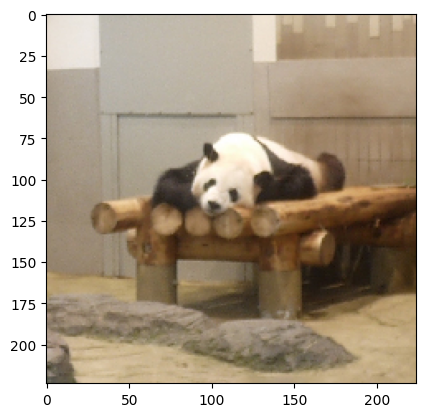

In [6]:
testimg = load_img('test.jpg', target_size=(224, 224))
plt.imshow(testimg)
plt.show()

In [8]:
# 予想
data = img_to_array(testimg)
data = np.expand_dims(data, axis=0)
data = preprocess_input(data)
predicts = model.predict(data)
results = decode_predictions(predicts, top=5)[0]
for r in results:
    name = r[1]
    pct = r[2]
    print(f"これは{name}です。{pct:.1%}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
これはgiant_pandaです。94.6%
これはsloth_bearです。0.7%
これはskunkです。0.3%
これはAmerican_black_bearです。0.3%
これはcolobusです。0.3%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


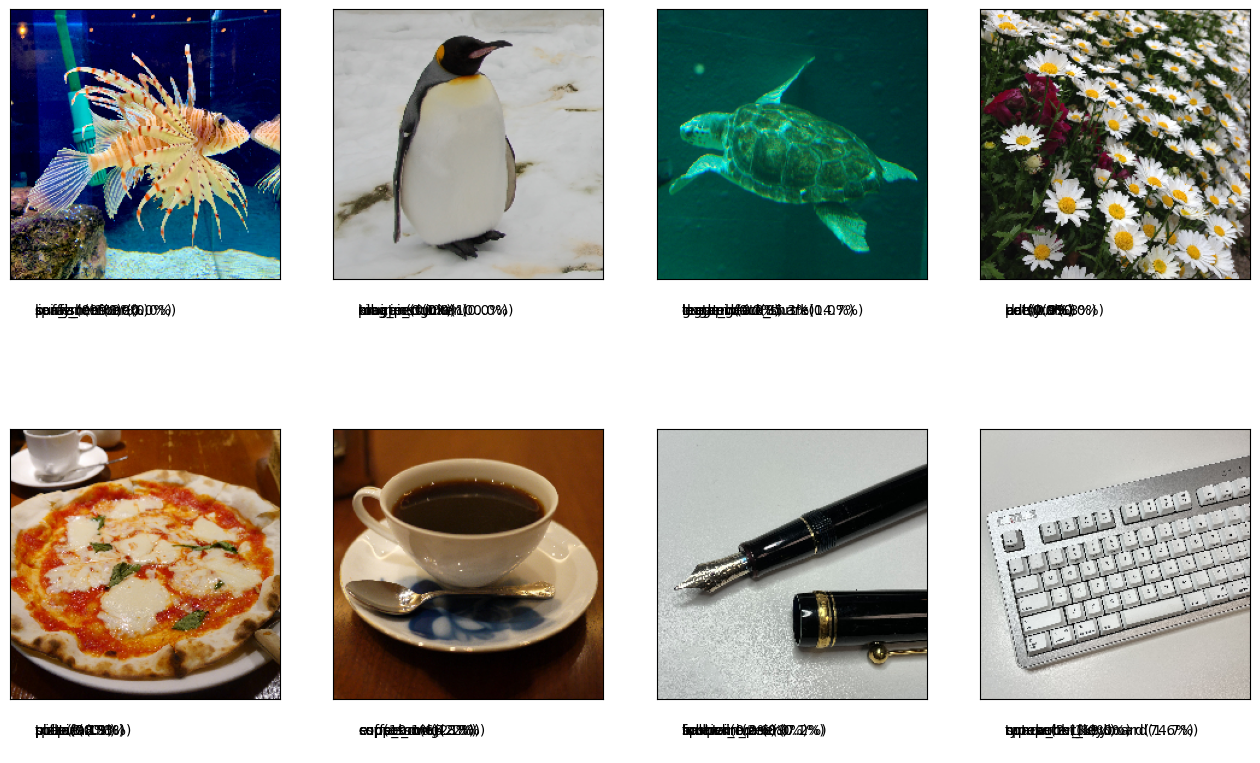

In [12]:
# まとめて予想を実行
filenames = ["img1.jpg","img2.jpg","img3.jpg","img4.jpg",
             "img5.jpg","img6.jpg","img7.jpg","img8.jpg"]

img = []
plt.figure(figsize=(16,10))
for i,filename in enumerate(filenames):
    img.append(load_img(filename, target_size=(224, 224)))
    data = img_to_array(img[i])
    data = np.expand_dims(data, axis=0)
    data = preprocess_input(data)
    predicts = model.predict(data)
    results = decode_predictions(predicts, top=5)[0]

    plt.subplot(2,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i])

    for i,r in enumerate(results):
        name = r[1]
        pct = r[2]
        msg = f"{name}({pct:.1%})"+"\n"
        plt.text(20,250+1*16,msg)
plt.show()